In [34]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
from cycler import cycler
from torch.utils.data import Dataset, DataLoader
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import sys
import os
import numpy as np
from torchvision import transforms
from torch.utils.data import DataLoader

sys.path.append('../')
from models.kmeans import Kmeans
from utils.horoma_dataset import HoromaDataset
from utils.transforms import Normalize
import utils.utils as utils
import utils.metrics as metrics


In [5]:
TRAIN_X_FILE = 'train_x.dat'
VALID_X_FILE = 'valid_x.dat'
VALID_Y_FILE = 'valid_y.txt'
ROOT_DIR = '/rap/jvb-000-aa/COURS2019/etudiants/data/horoma/'
RESULTS_DIR = 'results/'
TRAIN_SIZE = 1614214
VALID_SIZE = 201778

DEF_LABELS = "definition_labels.txt"
USED_TRAIN_SIZE = 400000
TEST_SPLIT = 150000

In [49]:
# Data Setup

valid_dataset = HoromaDataset(VALID_X_FILE, ROOT_DIR, (VALID_SIZE, 32, 32, 4))


print("calulating image mean")
mean_image = np.mean(valid_dataset.data[:,:,:,0:3])
print("calulating image std")
std_image = np.std(valid_dataset.data[:,:,:,0:3])
print("calulating height mean")
mean_height = np.mean(valid_dataset.data[:,:,:,3])
print("calulating image std")
std_height = np.std(valid_dataset.data[:,:,:,3])

transform = transforms.Compose([
    # ToTensor(),
    Normalize(0, 1, 0, 1)
])


valid_dataset = HoromaDataset(VALID_X_FILE, ROOT_DIR, (VALID_SIZE, 32, 32, 4), transform)


valid_data = np.empty((VALID_SIZE, 32 * 32 * 4))
for i, sample in enumerate(valid_dataset):
    if i % 25000 == 0:
        print("Loading valid data... {0:2f} % loaded"
              .format(100 * i / VALID_SIZE), end='\r')
    valid_data[i] = np.append(sample['image'].reshape(32 * 32 * 3),
                              sample['height'].reshape(32 * 32))
print("Loading valid data... 100.00 % loaded")

valid_y = np.loadtxt(ROOT_DIR + VALID_Y_FILE)

#valid_data = valid_data[0:2500]


calulating image mean
calulating image std
calulating height mean
calulating image std
Loading valid data... 100.00 % loadedded


In [9]:
labels = np.loadtxt("/rap/jvb-000-aa/COURS2019/etudiants/data/horoma/valid_y.txt")
definition = open("/rap/jvb-000-aa/COURS2019/etudiants/data/horoma/definition_labels.txt","r")

labels_def = []
for line in definition:
    labels_def.append(re.split(',|\n',line)[0:-1])
print(len(labels_def))

#valid label species
valid_label_species = []
for label in labels:
    idx = int(label)-1
    valid_label_species.append(labels_def[idx][0])
valid_label_species = np.array(valid_label_species)

species = list(set(valid_label_species))

#valid label density
valid_label_density = []
for label in labels:
    idx = int(label)-1
    valid_label_density.append(labels_def[idx][1])
valid_label_density = np.array(valid_label_density)

density = list(set(valid_label_density))
print(len(density))
print(density)

#valid label heights
valid_label_height = []
for label in labels:
    idx = int(label)-1
    valid_label_height.append(labels_def[idx][2])
valid_label_height = np.array(valid_label_height)

height = list(set(valid_label_height))
print(len(height))
print(height)

95
9
['75', '65', '25', '45', '85', '55', '0', '35', '95']
7
['15', '16', '25', '10', '20', '0', '5']


In [10]:
def plot_function_specie(df,fig_title):
    
    markers_list = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X','o', 'v', '^', '<']

    g = sns.lmplot( x="x1", y="x2", data=df, fit_reg=False, hue='specie', legend=True,legend_out =True,markers=markers_list,scatter_kws={'linewidths':0.5,'edgecolor':'k'})
    g.fig.set_size_inches(10,7)
    plt.title(fig_title)



In [11]:
def plot_function_density(df,fig_title):
    
    markers_list = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*']

    g = sns.lmplot( x="x1", y="x2", data=df, fit_reg=False, hue='density', legend=True,legend_out =True,markers=markers_list,scatter_kws={'linewidths':0.5,'edgecolor':'k'})
    g.fig.set_size_inches(10,7)
    plt.title(fig_title)


In [12]:
def plot_function_height(df,fig_title):
    
    markers_list = ['o', 'v', '^', '<', '>', '8', 's']

    g = sns.lmplot( x="x1", y="x2", data=df, fit_reg=False, hue='height', legend=True,legend_out =True,markers=markers_list,scatter_kws={'linewidths':0.5,'edgecolor':'k'})
    g.fig.set_size_inches(10,7)
    plt.title(fig_title)


In [13]:
#Isomap
embedding = Isomap(n_components=2)
X_transformed = embedding.fit_transform(valid_data[:2500,:])
#plot_function(X_transformed,valid_label[:2500],"Isomap",species)

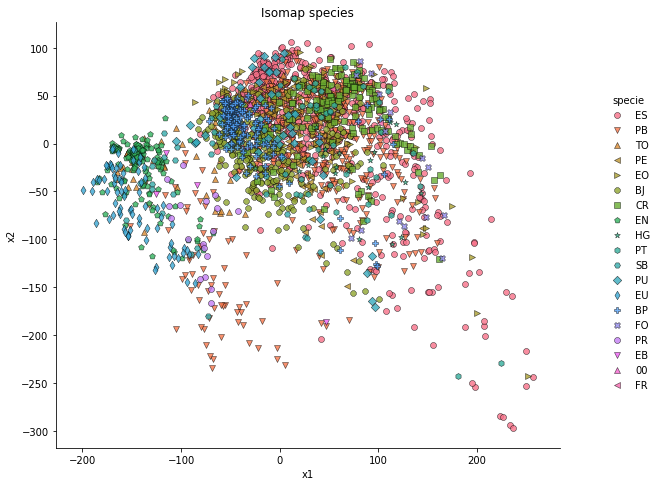

In [14]:
df = pd.DataFrame(X_transformed)
df["specie"] = valid_label_species[0:2500]
df.columns = ['x1', 'x2',"specie"]
plot_function_specie(df,"Isomap species")

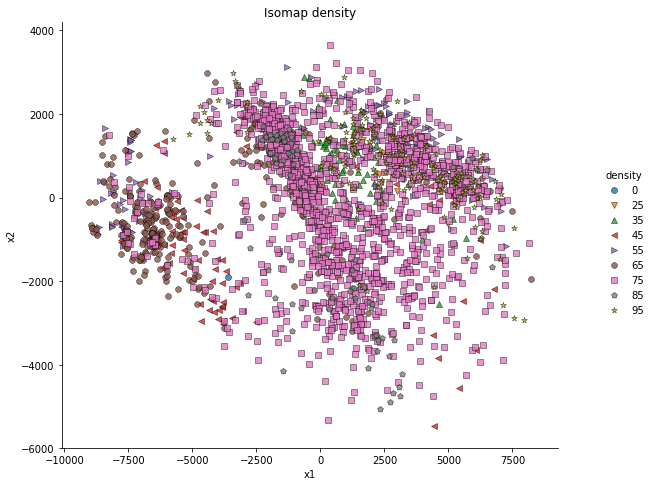

In [97]:
df = pd.DataFrame(X_transformed)
df["density"] = valid_label_density[0:2500]
df.columns = ['x1', 'x2',"density"]
plot_function_density(df,"Isomap density")

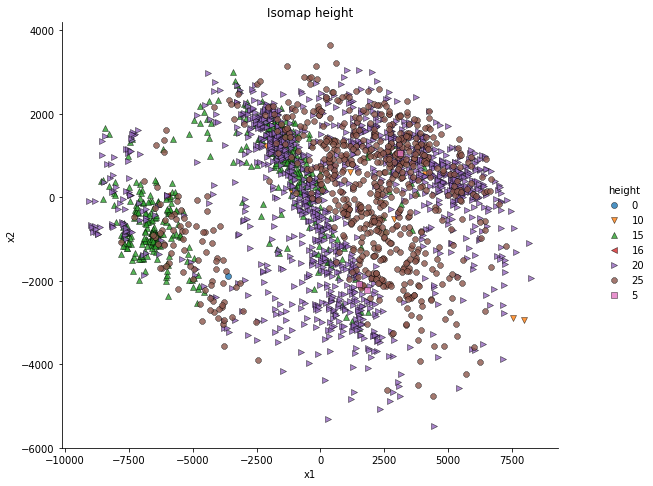

In [99]:
df = pd.DataFrame(X_transformed)
df["height"] = valid_label_height[0:2500]
df.columns = ['x1', 'x2',"height"]
plot_function_height(df,"Isomap height")

In [56]:
#TSNE
pca = PCA(n_components=500)
pca_transformed = pca.fit_transform(valid_data[:2500,:])
X_transformed = TSNE(n_components=2).fit_transform(pca_transformed)


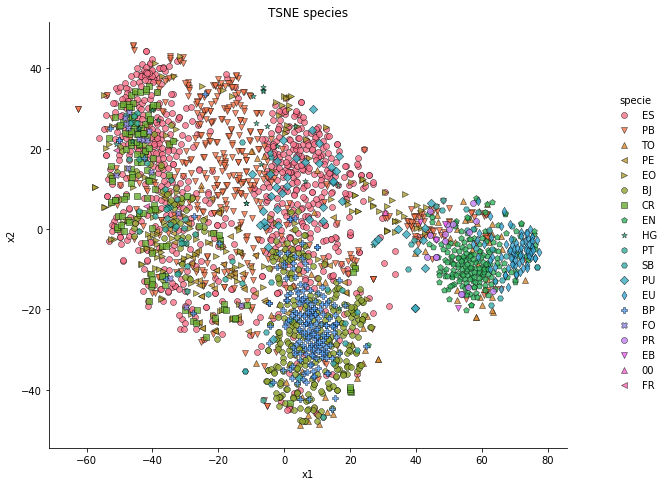

In [57]:
df = pd.DataFrame(X_transformed)
df["specie"] = valid_label_species [0:2500]
df.columns = ['x1', 'x2',"specie"]
plot_function_specie(df,"TSNE species")

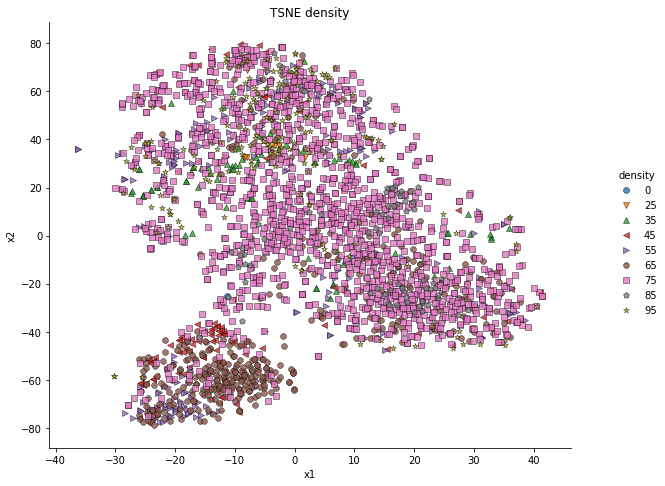

In [106]:
df = pd.DataFrame(X_transformed)
df["density"] = valid_label_density[0:2500]
df.columns = ['x1', 'x2',"density"]
plot_function_density(df,"TSNE density")

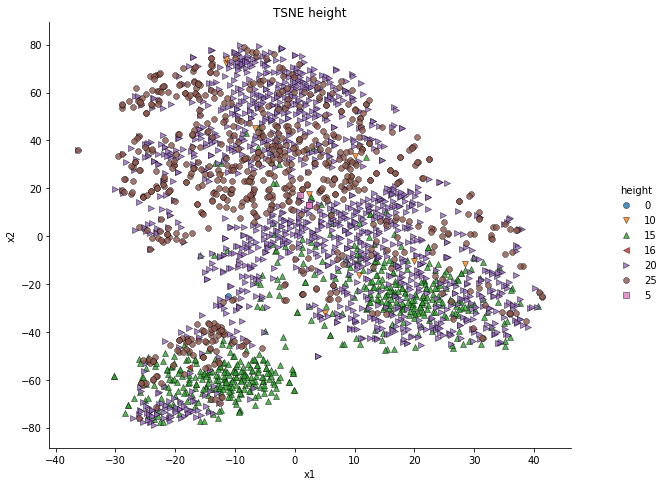

In [107]:
df = pd.DataFrame(X_transformed)
df["height"] = valid_label_height[0:2500]
df.columns = ['x1', 'x2',"height"]
plot_function_height(df,"TSNE height")

In [45]:
def plot_3D(result,figname):
    markers_list = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X','o', 'v', '^', '<']
    sns.set_style("white")
    # Plot initialisation
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    fig.set_size_inches(15,12)

    NUM_COLORS = len(species)

    cm = plt.get_cmap('tab20c')
    colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

    ax.set_prop_cycle(cycler('color', colors))

    i=0
    for number in species:

        #print(result['PCA0'][np.where(Y==number)])
        ax.scatter(np.array(result['PCA0'])[np.where(Y==number)], np.array(result['PCA1'])[np.where(Y==number)],np.array(result['PCA2'])[np.where(Y==number)],label = number,marker=markers_list[i],norm=True,s=60)
        i+=1
    #ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=40)

    # make simple, bare axis lines through space:
    xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
    ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
    yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
    ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
    zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
    ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')

    # label the axes
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    #ax.set_title("PCA on Horoma valid data")
    ax.legend(loc=7, bbox_to_anchor=(0.85,0.6))
    #plt.show()
    plt.savefig(figname, bbox_inches='tight',dpi=300)


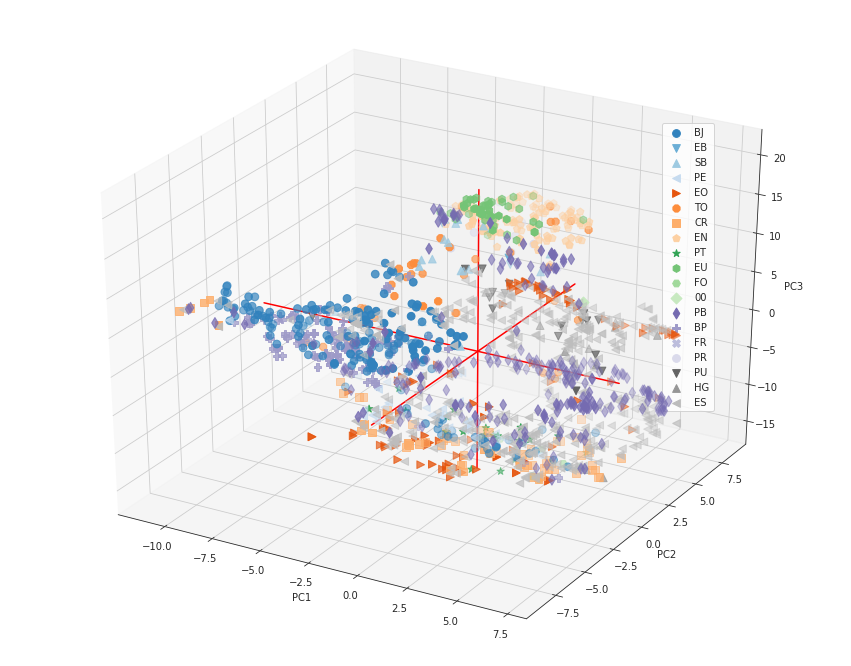

In [50]:

df = pd.DataFrame(valid_data)
Y= valid_label_species[0:1500]

# Run The PCA
pca = PCA(n_components=3)
pca.fit(df)
pca_transformed = pca.transform(valid_data[:1500,:])

#'''
#pca = PCA(n_components=250)
#pca_transformed = pca.fit_transform(valid_data[:1500,:])
X_transformed = TSNE(n_components=3).fit_transform(pca_transformed)
#'''

#embedding = Isomap(n_components=3)
#X_transformed = embedding.fit_transform(valid_data[:1500,:])


# Store results of PCA in a data frame
result=pd.DataFrame(X_transformed , columns=['PCA%i' % i for i in range(3)])
plot_3D(result,"TSNE_unnormalized")



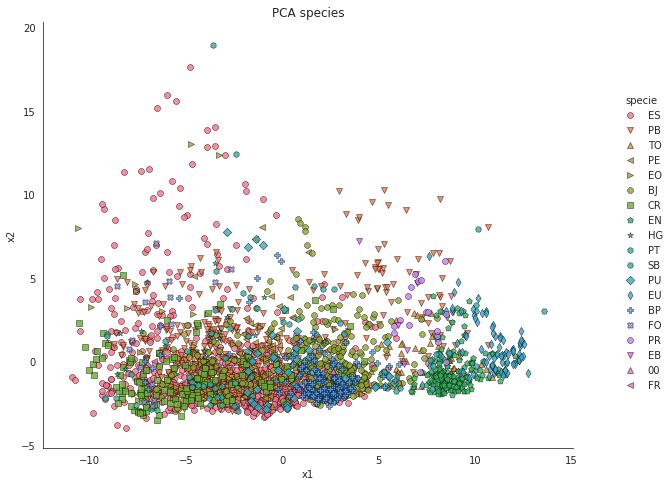

In [18]:
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(valid_data[:2500,:])

df = pd.DataFrame(pca_transformed)
df["specie"] = valid_label_species[0:2500]
df.columns = ['x1', 'x2',"specie"]
plot_function_specie(df,"PCA species")

memmap([[[[2.0400000e+02, 6.4000000e+01, 9.2000000e+01, 4.9830627e+00],
          [2.1100000e+02, 7.2000000e+01, 9.9000000e+01, 4.9557190e+00],
          [2.1900000e+02, 8.2000000e+01, 1.0900000e+02, 4.9392395e+00],
          ...,
          [1.9300000e+02, 5.8000000e+01, 8.5000000e+01, 3.5226746e+00],
          [2.0200000e+02, 6.4000000e+01, 9.3000000e+01, 3.4364014e+00],
          [2.1800000e+02, 7.7000000e+01, 1.0800000e+02, 3.3516235e+00]],

         [[2.0800000e+02, 6.9000000e+01, 9.6000000e+01, 5.0267029e+00],
          [2.0100000e+02, 6.1000000e+01, 8.7000000e+01, 4.9914551e+00],
          [2.1200000e+02, 7.3000000e+01, 9.9000000e+01, 4.9552917e+00],
          ...,
          [2.1000000e+02, 7.7000000e+01, 1.0100000e+02, 3.5763245e+00],
          [1.9900000e+02, 6.6000000e+01, 9.0000000e+01, 3.4843140e+00],
          [2.0100000e+02, 6.3000000e+01, 8.8000000e+01, 3.3810120e+00]],

         [[2.1400000e+02, 7.5000000e+01, 1.0300000e+02, 5.0379028e+00],
          [2.0200000e+02, 6.20

In [144]:
valid_dataset.data.shape

(201778, 32, 32, 4)

In [148]:
mean_image

90.96442